In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
im = torchvision.datasets.ImageFolder("image_dataset/")

In [80]:
df = pd.read_csv('final_dataset.csv',index_col=0)

In [81]:
lista = []
for i in range(len(im.imgs)):
    try:
        #sample_idx = torch.randint(len(im), size=(1,)).item()
        img, label = im[i]
        #figure.add_subplot(rows, cols, i)
        species_name = (list(im.class_to_idx.keys())[label]).replace('_',' ')
        #plt.title(species_name)
        #plt.axis("off")
        #plt.imshow(img, cmap="gray")
    #plt.show()
    except:
        lista.append(im.imgs[i])


In [ ]:
len(lista)


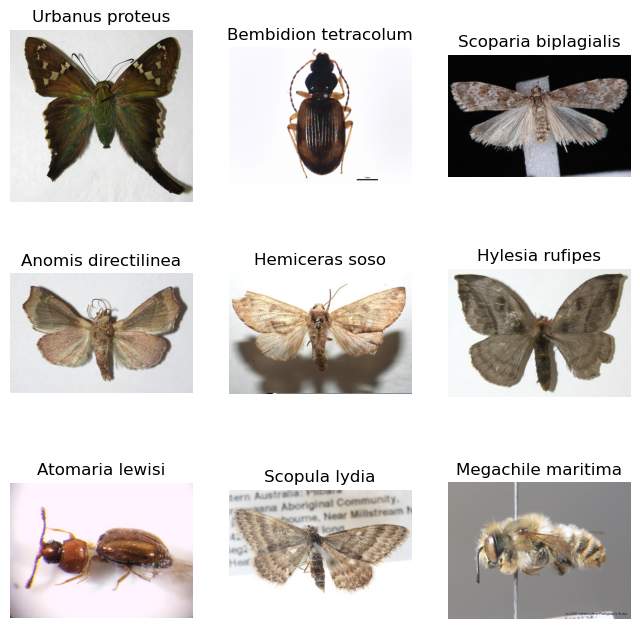

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(im), size=(1,)).item()
    img, label = im[sample_idx]
    figure.add_subplot(rows, cols, i)
    species_name = (list(im.class_to_idx.keys())[label]).replace('_',' ')
    plt.title(species_name)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [9]:
im.classes

['Abax_parallelepipedus',
 'Abax_parallelus',
 'Acleris_chalybeana',
 'Acleris_macdunnoughi',
 'Acordulecera_dorsalis',
 'Acrolophus_forbesi',
 'Acrolophus_kearfotti',
 'Acronicta_alni',
 'Acronicta_grisea',
 'Acronicta_increta',
 'Acronicta_modica',
 'Acronicta_psi',
 'Acronicta_rumicis',
 'Adalia_decempunctata',
 'Adelpha_iphicleola',
 'Adelpha_iphiclus',
 'Adelpha_leucophthalma',
 'Adelpha_lorzae',
 'Adelpha_melanthe',
 'Adelpha_salmonides',
 'Adelpha_tracta',
 'Adrastus_pallens',
 'Aedes_aegypti',
 'Aedes_albopictus',
 'Aedes_euplocamus',
 'Aedes_vexans',
 'Agabus_bipustulatus',
 'Agabus_infuscatus',
 'Agabus_sturmii',
 'Agabus_uliginosus',
 'Agonum_emarginatum',
 'Agonum_fuliginosum',
 'Agonum_lugens',
 'Agonum_marginatum',
 'Agonum_micans',
 'Agonum_muelleri',
 'Agonum_sexpunctatum',
 'Agonum_viduum',
 'Agriophara_confertella',
 'Agriophara_discobola',
 'Agriophara_dyscapna',
 'Agriophara_plagiosema',
 'Agriotes_lineatus',
 'Agriotes_pallidulus',
 'Agrotis_exclamationis',
 'Agrot